In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.size

6912

In [8]:
df.shape

(768, 9)

In [9]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
corr=df.corr()

In [12]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

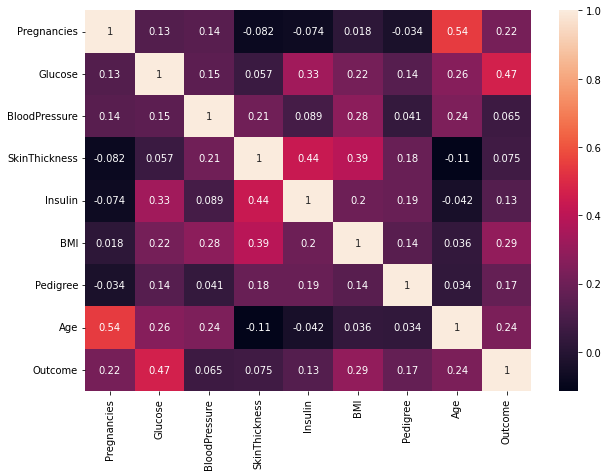

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

In [14]:
df=df.drop(['Pedigree','Pregnancies','SkinThickness'],axis=1)

In [15]:
df.columns

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'Outcome'], dtype='object')

Glucose             AxesSubplot(0.125,0.772143;0.352273x0.107857)
BloodPressure    AxesSubplot(0.547727,0.772143;0.352273x0.107857)
Insulin             AxesSubplot(0.125,0.642714;0.352273x0.107857)
BMI              AxesSubplot(0.547727,0.642714;0.352273x0.107857)
Age                 AxesSubplot(0.125,0.513286;0.352273x0.107857)
Outcome          AxesSubplot(0.547727,0.513286;0.352273x0.107857)
dtype: object

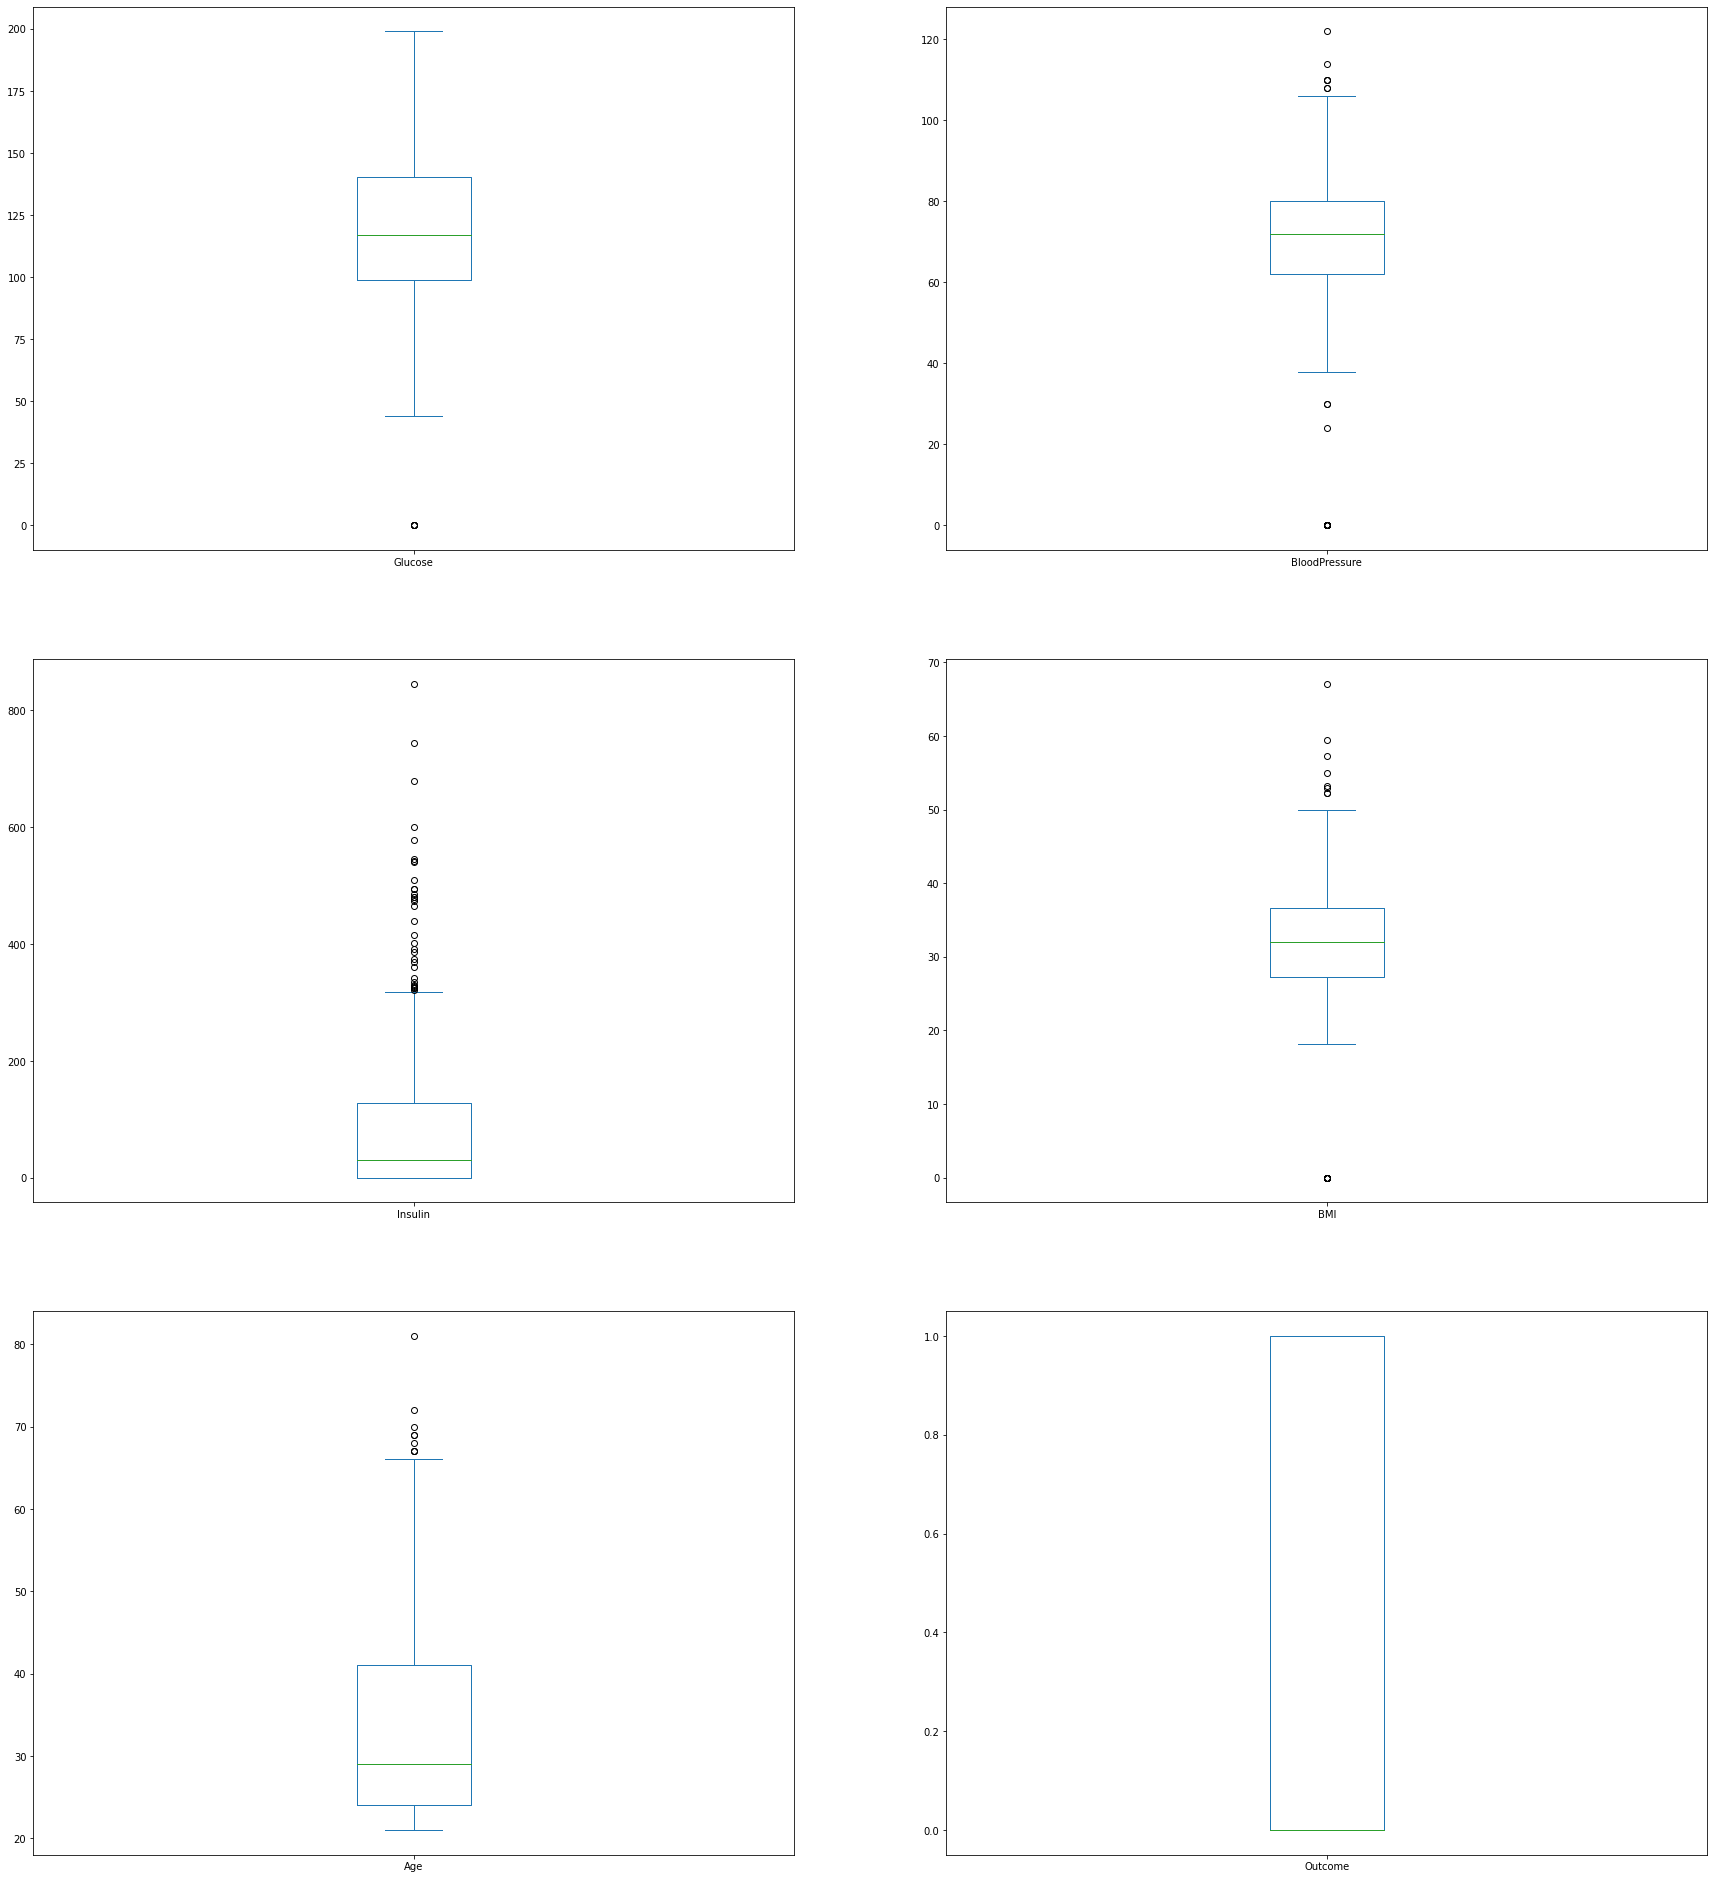

In [16]:
df.plot(kind='box',figsize=(30,70),layout=(6,2),subplots=True)

In [17]:
def remove_outliers(df1,col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    IQR=q3-q1
    low=q1-1.5*IQR
    upp=q3+1.5*IQR
    df1[col]=np.clip(df1[col],low,upp)
    return df1
    

In [18]:
li=df.columns

In [19]:
for i in li:
    remove_outliers(df,i)

Glucose             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
BloodPressure    AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
Insulin             AxesSubplot(0.125,0.677439;0.352273x0.0920732)
BMI              AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
Age                 AxesSubplot(0.125,0.566951;0.352273x0.0920732)
Outcome          AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

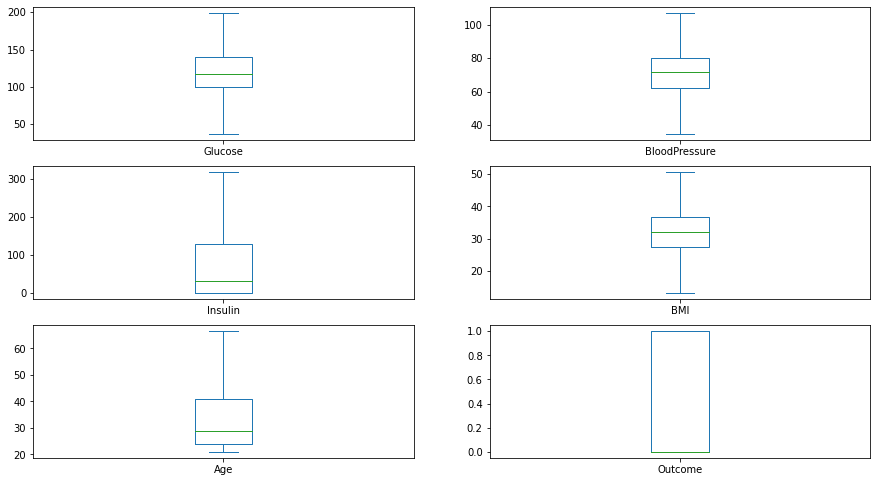

In [20]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

In [21]:
df

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148.0,72.0,0.0,33.6,50.0,1
1,85.0,66.0,0.0,26.6,31.0,0
2,183.0,64.0,0.0,23.3,32.0,1
3,89.0,66.0,94.0,28.1,21.0,0
4,137.0,40.0,168.0,43.1,33.0,1
...,...,...,...,...,...,...
763,101.0,76.0,180.0,32.9,63.0,0
764,122.0,70.0,0.0,36.8,27.0,0
765,121.0,72.0,112.0,26.2,30.0,0
766,126.0,60.0,0.0,30.1,47.0,1


In [22]:
df[df['Insulin']==0]

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148.0,72.0,0.0,33.6,50.0,1
1,85.0,66.0,0.0,26.6,31.0,0
2,183.0,64.0,0.0,23.3,32.0,1
5,116.0,74.0,0.0,25.6,30.0,0
7,115.0,35.0,0.0,35.3,29.0,0
...,...,...,...,...,...,...
761,170.0,74.0,0.0,44.0,43.0,1
762,89.0,62.0,0.0,22.5,33.0,0
764,122.0,70.0,0.0,36.8,27.0,0
766,126.0,60.0,0.0,30.1,47.0,1


In [23]:
count=0
for i in df.index:
    if df.loc[i,'Insulin']==0:
        df.loc[i,'Insulin']=df['Insulin'].mean()
        count=count+1

In [24]:
count

374

In [25]:
df[df['Glucose']==0]

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome


In [26]:
df[df['BloodPressure']==0]

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome


In [27]:
df[df['BMI']==0]

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome


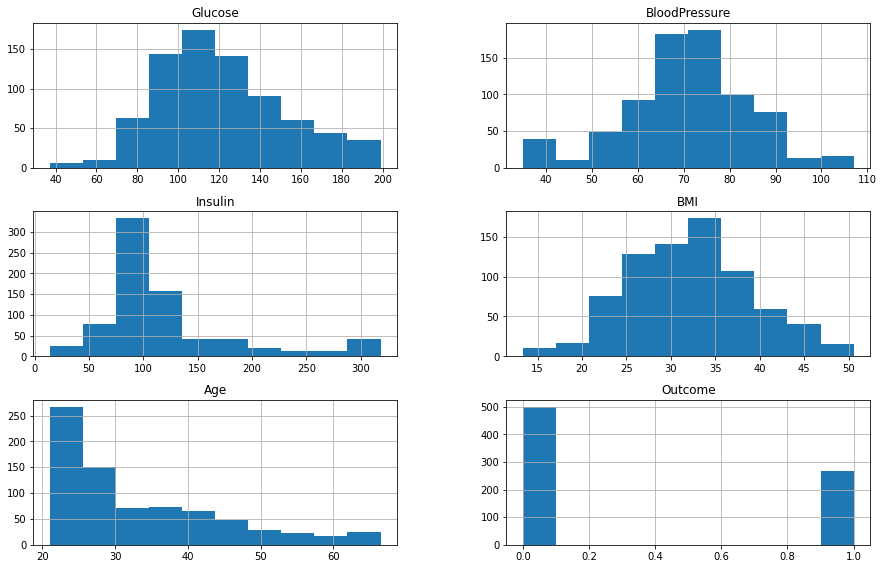

In [30]:
data=df.hist(figsize=(15,20),layout=(6,2))

In [31]:
df.groupby('Age')['Glucose'].value_counts()

Age   Glucose
21.0  99.0       5
      84.0       3
      94.0       3
      102.0      3
      89.0       2
                ..
66.5  134.0      1
      136.0      1
      145.0      1
      146.0      1
      194.0      1
Name: Glucose, Length: 664, dtype: int64

In [36]:
df.groupby('Outcome')['Glucose'].mean()

Outcome
0    110.202750
1    141.534515
Name: Glucose, dtype: float64

In [37]:
knn=KNeighborsClassifier(n_neighbors=5)

In [38]:
x=df.loc[:,['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']]

In [39]:
x

,Glucose,BloodPressure,Insulin,BMI,Age
0,148.0,72.0,73.652669,33.6,50.0
1,85.0,66.0,73.748571,26.6,31.0
2,183.0,64.0,73.844598,23.3,32.0
3,89.0,66.0,94.000000,28.1,21.0
4,137.0,40.0,168.000000,43.1,33.0
...,...,...,...,...,...
763,101.0,76.0,180.000000,32.9,63.0
764,122.0,70.0,119.357009,36.8,27.0
765,121.0,72.0,112.000000,26.2,30.0
766,126.0,60.0,119.512421,30.1,47.0


In [40]:
y=df.iloc[:,-1]

In [41]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [48]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc=StandardScaler()

In [51]:
x_train=sc.fit_transform(x_train)

In [52]:
x_test=sc.fit_transform(x_test)

In [53]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
pred=knn.predict(x_test)

In [55]:
from sklearn import metrics

In [56]:
metrics.accuracy_score(y_test,pred)

0.7922077922077922

In [57]:
metrics.confusion_matrix(y_test,pred)

array([[88, 18],
       [14, 34]], dtype=int64)

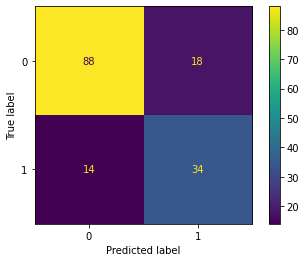

In [58]:
dist=metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [59]:
metrics.precision_score(y_test,pred)

0.6538461538461539

In [60]:
metrics.recall_score(y_test,pred)

0.7083333333333334

In [61]:
metrics.f1_score(y_test,pred)

0.68

In [63]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       106
           1       0.65      0.71      0.68        48

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.79      0.79       154

